Reference:
    - <https://seaborn.pydata.org/tutorial/relational.html>

In [1]:
import seaborn as sns;sns.set()
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
os.chdir(r'C:\Users\dell\PycharmProjects\MachineLearning\Pandas\datasets')

In [5]:
tips = pd.read_csv('./tips.csv', index_col = 0)
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


# `sns.relplot` (Figure-level function)

Contains axes-level functions:
- `sns.scatterplot`  
- `sns.lineplot`  

**`sn.relplot`**: relationship plot functions with Facet

In [34]:
# help(sns.relplot)

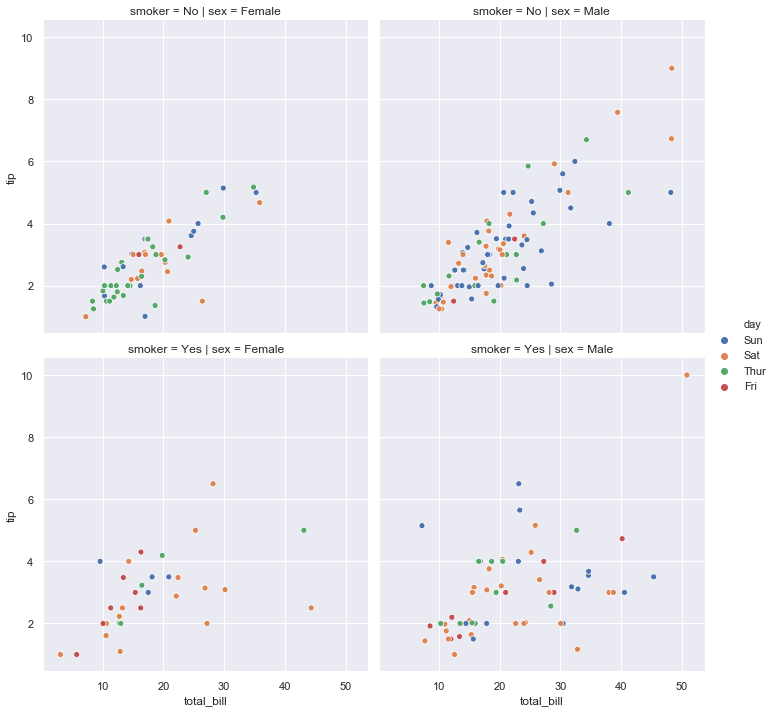

In [10]:
sns.relplot(x = 'total_bill', y = 'tip', col = 'sex', row = 'smoker', hue = 'day', data = tips, kind = 'scatter')

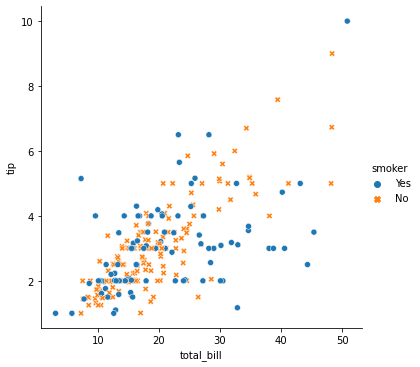

In [5]:
tips = sns.load_dataset('tips')
sns.relplot(data = tips, x = 'total_bill', y = 'tip', style = 'smoker', hue = 'smoker')

In [6]:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


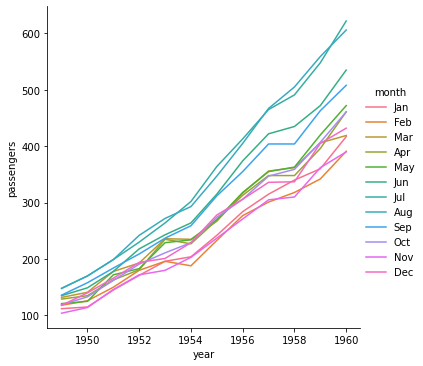

In [11]:
sns.relplot(data = flights, x = 'year', y = 'passengers', hue = 'month', kind = 'line')

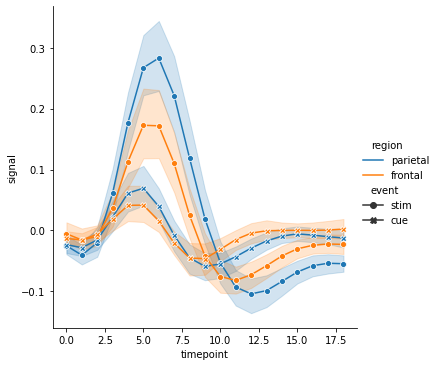

In [33]:
sns.relplot(x="timepoint", y="signal", hue="region", style="event",
            dashes=False, markers=True, kind="line", data=fmri);

# `sns.scatterplot` (Axes-level function)

In [35]:
# ?sns.scatterplot

# `sns.lineplot` (Axes-level function)

In [36]:
# ?sns.lineplot

## `geom_line` and `geom_path`

Because `lineplot()` assumes that you are most often trying to draw y as a function of x, the default behavior is to sort the data by the x values before plotting. However, this can be disabled:

set `sort = False`, this will behave like **`geom_path()`**

<AxesSubplot:xlabel='x', ylabel='y'>

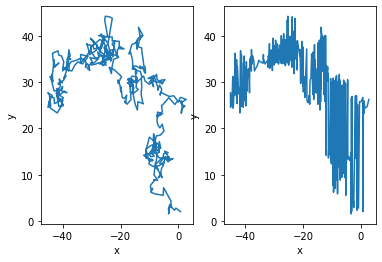

In [23]:
fig, axes = plt.subplots(1, 2)
df = pd.DataFrame(np.random.randn(500, 2).cumsum(axis=0), columns=["x", "y"])
# geom_path
sns.lineplot(x="x", y="y", sort=False, data=df, ax = axes[0])
# geom_line (default)
sns.lineplot(data=df, x = 'x', y = 'y', sort = True,  ax = axes[1])

## `geom_smooth`

More complex datasets will have multiple measurements for the same value of the x variable. The default behavior in seaborn is to aggregate the multiple measurements at each x value by plotting the mean and the 95% confidence interval around the mean:

In [24]:
fmri = sns.load_dataset("fmri")
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


<AxesSubplot:xlabel='timepoint', ylabel='signal'>

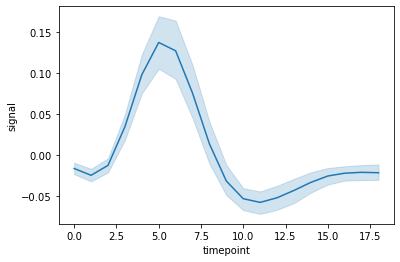

In [25]:
sns.lineplot(data = fmri, x = 'timepoint', y = 'signal')

The confidence intervals are computed using bootstrapping, which can be time-intensive for larger datasets. It’s therefore possible to disable them **`ci = None`**

<AxesSubplot:xlabel='timepoint', ylabel='signal'>

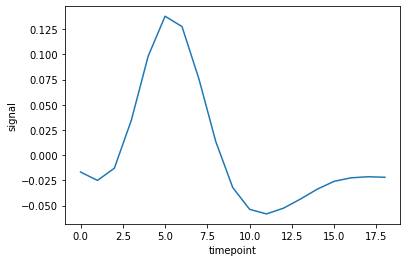

In [26]:
sns.lineplot(data = fmri, x = 'timepoint', y = 'signal', ci = None)

Another good option, especially with larger data, is to represent the spread of the distribution at each timepoint by plotting the standard deviation instead of a confidence interval:  
    **`ci = "sd"`**



<AxesSubplot:xlabel='timepoint', ylabel='signal'>

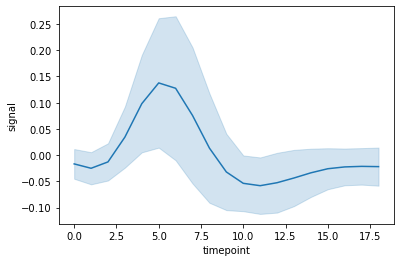

In [27]:
sns.lineplot(data = fmri, x = 'timepoint', y = 'signal', ci = 'sd')

To turn off aggregation altogether, set the estimator parameter to None This might produce a strange effect when the data have multiple observations at each point.

<AxesSubplot:xlabel='timepoint', ylabel='signal'>

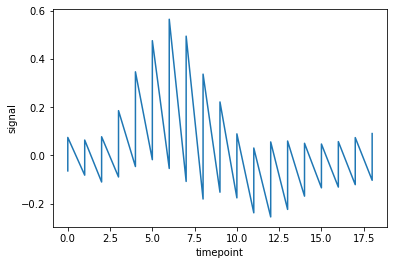

In [28]:
sns.lineplot(data = fmri, x = 'timepoint', y = 'signal', estimator = None)

## subset with sematic mappings

In [29]:
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


<AxesSubplot:xlabel='timepoint', ylabel='signal'>

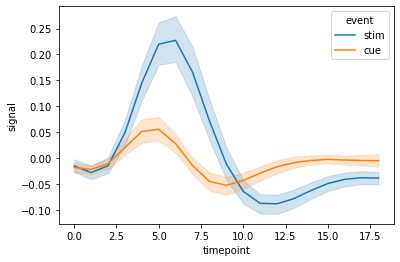

In [30]:
sns.lineplot(data = fmri, x = 'timepoint', y = 'signal', hue = 'event')

<AxesSubplot:xlabel='timepoint', ylabel='signal'>

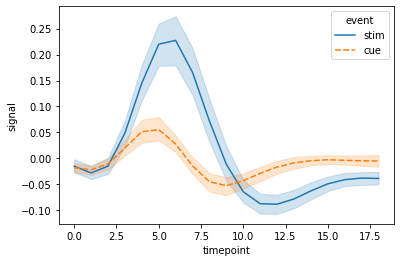

In [31]:
# style is like linetype in ggplot2
sns.lineplot(data = fmri, x = 'timepoint', y = 'signal', hue = 'event', style = 'event')